<a href="https://colab.research.google.com/github/rizalhakikal/rizal_portfolio/blob/main/Rizal_Fiqri_Hakikal_Tugas_DSF_36_0_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

# **2. Read Dataset**

In [36]:
import pandas as pd
from sklearn import datasets

# memuat dataseat linnerud dari scikit-learn
linnerud = datasets.load_linnerud()

X = linnerud.data   # inputan untuk machine learning
y = linnerud.target # output yang dinginkan dari machine learning

# mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=linnerud.feature_names)
df_y = pd.Series(y[:, 0], name='target')

In [37]:
df_X

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [38]:
df_y

,target
0,191.0
1,189.0
2,193.0
3,162.0
4,189.0
5,182.0
6,211.0
7,167.0
8,176.0
9,154.0


In [39]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(20)

,Chins,Situps,Jumps,target
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0
5,4.0,101.0,42.0,182.0
6,8.0,101.0,38.0,211.0
7,6.0,125.0,40.0,167.0
8,15.0,200.0,40.0,176.0
9,17.0,251.0,250.0,154.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   target  20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes


In [41]:
df['target'].unique()

array([191., 189., 193., 162., 182., 211., 167., 176., 154., 169., 166.,
       247., 202., 157., 156., 138.])

In [42]:
df.describe()

,Chins,Situps,Jumps,target
count,20.000000,20.000000,20.00000,20.000000
mean,9.450000,145.550000,70.30000,178.600000
std,5.286278,62.566575,51.27747,24.690505
min,1.000000,50.000000,25.00000,138.000000
25%,4.750000,101.000000,39.50000,160.750000
50%,11.500000,122.500000,54.00000,176.000000
75%,13.250000,210.000000,85.25000,191.500000
max,17.000000,251.000000,250.00000,247.000000


# **3. Split Data, Train The Model, Predict, & Evaluate**

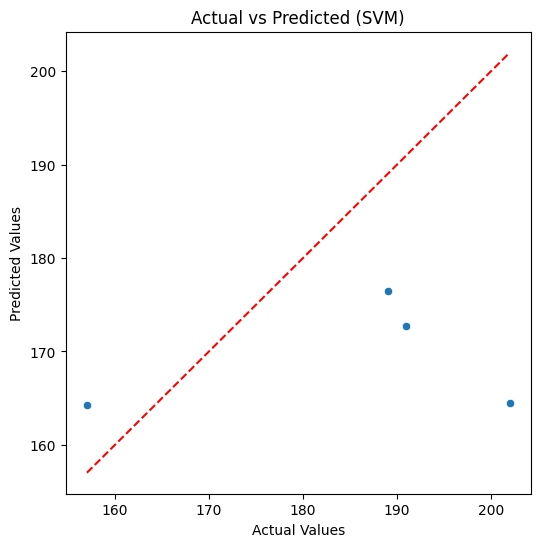

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 🔹 Data (Linnerud dataset manual input)
data = {
    "Chins": [5, 2, 12, 12, 13, 4, 8, 6, 15, 17, 17, 13, 14, 1, 6, 12, 4, 11, 15, 2],
    "Situps": [162, 110, 101, 105, 155, 101, 101, 125, 200, 251, 120, 210, 215, 50, 70, 210, 60, 230, 225, 110],
    "Jumps": [60, 60, 101, 37, 58, 42, 38, 40, 40, 250, 38, 115, 105, 50, 31, 120, 25, 80, 73, 43],
    "Target": [191, 189, 193, 162, 189, 182, 211, 167, 176, 154, 169, 166, 154, 247, 193, 202, 176, 157, 156, 138]
}

# 🔹 Mengubah data menjadi DataFrame
df = pd.DataFrame(data)

# 🔹 Pisahkan fitur (X) dan target (y)
X = df[["Chins", "Situps", "Jumps"]]
y = df["Target"]

# 🔹 Normalisasi data (Standardization)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Harus reshape untuk skala target

# 🔹 Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 🔹 Model SVM (Support Vector Regression)
svr = SVR(kernel="rbf")  # Gunakan kernel RBF untuk non-linear regression
svr.fit(X_train, y_train)

# 🔹 Prediksi dengan model
y_pred_scaled = svr.predict(X_test)

# 🔹 Transform hasil prediksi kembali ke skala asli
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 🔹 Scatter plot hasil prediksi vs aktual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_original, y=y_pred)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')  # Garis referensi
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (SVM)")
plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Evaluasi Model
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

# 🔹 Cetak hasil evaluasi
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE)  : {mae:.2f}")
print(f"Mean Squared Error (MSE)   : {mse:.2f}")
print(f"Root Mean Squared Error    : {rmse:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE)  : 18.88
Mean Squared Error (MSE)   : 487.32
Root Mean Squared Error    : 22.08
